[독버섯 분류]
- 데이터셋: mushrooms.csv
- 알고리즘: 지도학습 중 분류(LogisticRegression, DecisionTreeClassifier,VotingClassifier)
- 3개 알고리즘으로 구현 후 성능 비교

데이터 준비

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data='../data/mushrooms.csv'

mushroom_df=pd.read_csv(data)
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [146]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [147]:
for i in mushroom_df.columns:
    print(i,mushroom_df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [148]:
mushroom_df=mushroom_df.drop(['stalk-root'],axis=1)

In [149]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [150]:
mushroom_ohe=pd.get_dummies(mushroom_df)
mushroom_ohe

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


feature/target 분리

In [151]:
target_sr=mushroom_ohe['class_p']
feature_df=mushroom_ohe.iloc[:,2:]

In [152]:
target_sr

0        True
1       False
2       False
3        True
4       False
        ...  
8119    False
8120    False
8121    False
8122     True
8123    False
Name: class_p, Length: 8124, dtype: bool

In [153]:
feature_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


DecisionTreeClssifier

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [155]:
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_sr,random_state=10,stratify=target_sr)

In [156]:
print(f'x_train: {x_train.shape}, {x_train.ndim}d')
print(f'x_test: {x_test.shape}, {x_test.ndim}d')
print()
print(f'y_train: {y_train.shape}, {y_train.ndim}d')
print(f'y_test: {y_test.shape}, {y_test.ndim}d')

x_train: (6093, 112), 2d
x_test: (2031, 112), 2d

y_train: (6093,), 1d
y_test: (2031,), 1d


튜닝 없이 학습 진행

In [157]:
dt_model=DecisionTreeClassifier(random_state=0)

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [158]:
print('[dt_model.classes_]',dt_model.classes_)
print('[dt_model.n_classes]',dt_model.n_classes_,'개')
print('[dt_model.max_features_]',dt_model.max_features_,'개')


[dt_model.classes_] [False  True]
[dt_model.n_classes] 2 개
[dt_model.max_features_] 112 개


성능 평가

In [159]:
train_score=dt_model.score(x_train,y_train)
test_score=dt_model.score(x_test,y_test)

In [160]:
print('[train_score]',train_score)
print('[test_score]',test_score)

[train_score] 1.0
[test_score] 1.0


교차검증

In [161]:
from sklearn.model_selection import cross_validate

In [162]:
model=DecisionTreeClassifier(random_state=10)
result=cross_validate(model,x_train,y_train,return_train_score=True,return_estimator=True)

In [163]:
result_df=pd.DataFrame(result)
result_df

,fit_time,score_time,estimator,test_score,train_score
0,0.015622,0.002986,DecisionTreeClassifier(random_state=10),1.00000,1.0
1,0.011459,0.002074,DecisionTreeClassifier(random_state=10),0.99918,1.0
2,0.012557,0.002895,DecisionTreeClassifier(random_state=10),1.00000,1.0
3,0.013222,0.002539,DecisionTreeClassifier(random_state=10),1.00000,1.0
4,0.014285,0.002425,DecisionTreeClassifier(random_state=10),1.00000,1.0


튜닝

In [164]:
from sklearn.model_selection import GridSearchCV

In [198]:
params={'max_depth':[1,2,3,4,5,6,7,8,9,10,120],
        'min_samples_leaf':[5,3,2]}

In [199]:
gscv=GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,return_train_score=True)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 120],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [200]:
print('[train score]',gscv.score(x_train,y_train))
print('[test score]',gscv.score(x_test,y_test))

[train score] 0.9996717544723454
[test score] 0.999015263417036


In [201]:
best_model=gscv.best_estimator_
print('[best_model.depth]',best_model.get_depth)
print('[best_model.max_depth]',best_model.max_depth)
print('[best_model.min_samples_leaf]',best_model.min_samples_leaf)

[best_model.depth] <bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)>
[best_model.max_depth] 5
[best_model.min_samples_leaf] 3


In [202]:
print('[gscv.best_params_]',gscv.best_params_)
print('[gscv.best_score_]',gscv.best_score_)
print('[gscv.best_estimator_]',gscv.best_estimator_)

cv_result_df=pd.DataFrame(gscv.cv_results_)
cv_result_df

[gscv.best_params_] {'max_depth': 5, 'min_samples_leaf': 3}
[gscv.best_score_] 0.9996717274785787
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008365,0.001379,0.002949,0.000162,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.882691,0.895816,0.904840,...,0.889379,0.009894,31,0.891055,0.887772,0.885515,0.892513,0.890051,0.889381,0.002474
1,0.007990,0.000055,0.002376,0.000495,1,3,"{'max_depth': 1, 'min_samples_leaf': 3}",0.882691,0.895816,0.904840,...,0.889379,0.009894,31,0.891055,0.887772,0.885515,0.892513,0.890051,0.889381,0.002474
2,0.007466,0.001148,0.002579,0.000478,1,2,"{'max_depth': 1, 'min_samples_leaf': 2}",0.882691,0.895816,0.904840,...,0.889379,0.009894,31,0.891055,0.887772,0.885515,0.892513,0.890051,0.889381,0.002474
3,0.008969,0.000629,0.003189,0.000399,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.929450,0.917966,0.925349,...,0.927459,0.005866,28,0.926959,0.929832,0.927985,0.927179,0.925333,0.927458,0.001466
4,0.009210,0.000610,0.002378,0.000514,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.929450,0.917966,0.925349,...,0.927459,0.005866,28,0.926959,0.929832,0.927985,0.927179,0.925333,0.927458,0.001466
5,0.008765,0.000749,0.002393,0.000518,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.929450,0.917966,0.925349,...,0.927459,0.005866,28,0.926959,0.929832,0.927985,0.927179,0.925333,0.927458,0.001466
6,0.009640,0.000352,0.002797,0.000342,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.966366,0.963905,0.964725,...,0.965699,0.001404,25,0.965531,0.966147,0.965942,0.965744,0.965128,0.965698,0.000351
7,0.010630,0.000584,0.003021,0.000503,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.966366,0.963905,0.964725,...,0.965699,0.001404,25,0.965531,0.966147,0.965942,0.965744,0.965128,0.965698,0.000351
8,0.010612,0.000490,0.002737,0.000355,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.966366,0.963905,0.964725,...,0.965699,0.001404,25,0.965531,0.966147,0.965942,0.965744,0.965128,0.965698,0.000351
9,0.011971,0.000440,0.002428,0.000531,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",1.000000,0.999180,0.998359,...,0.999179,0.000519,16,0.998974,0.999179,0.999384,0.999179,0.999179,0.999179,0.000130


시각화

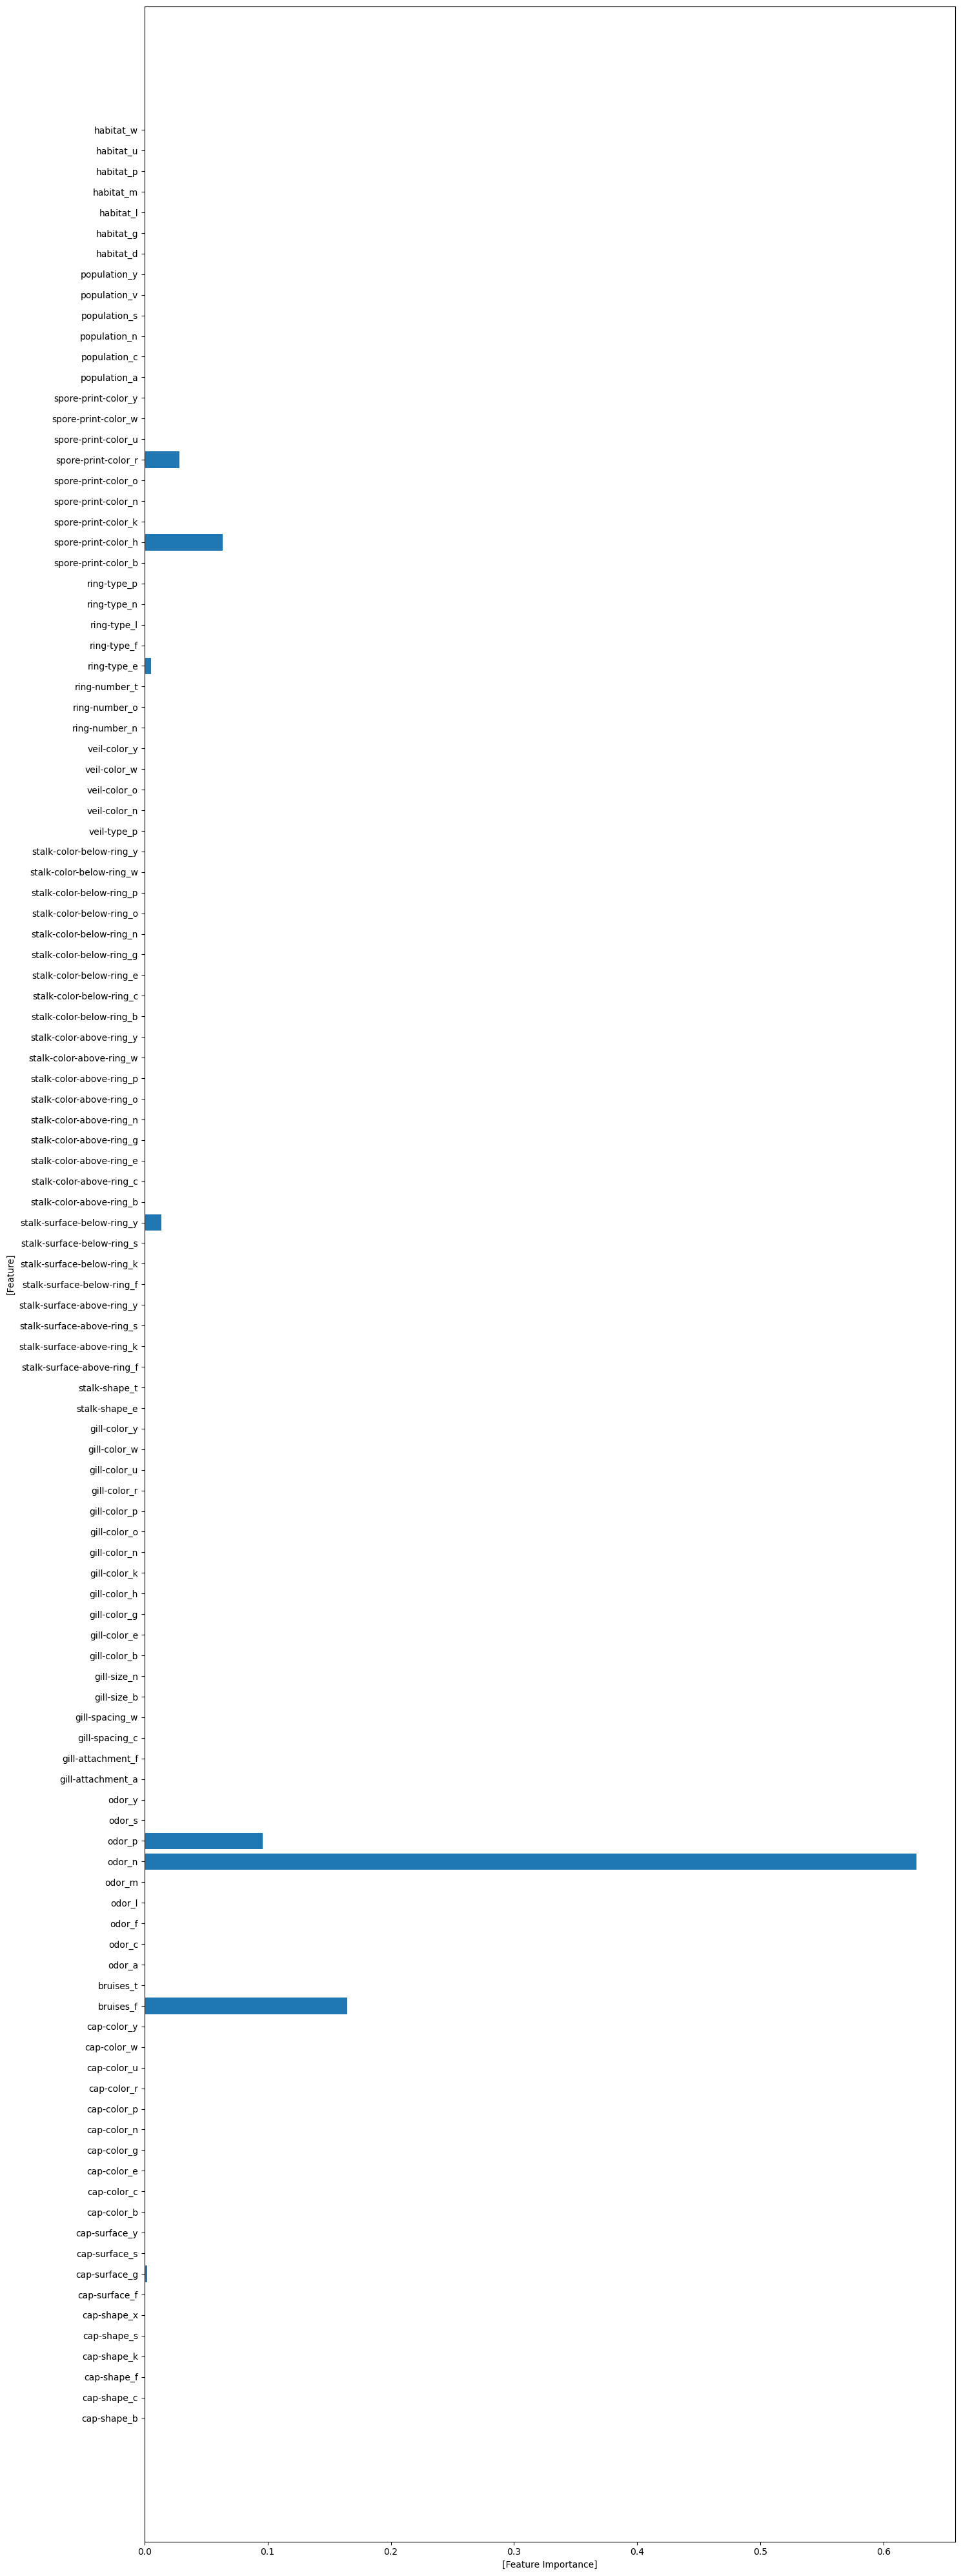

In [234]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,40))
plt.barh(range(best_model.n_features_in_),best_model.feature_importances_,align='center')
plt.yticks(np.arange(best_model.n_features_in_),best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('[Feature]')
plt.show()

In [203]:
from sklearn.tree import export_graphviz

export_graphviz(best_model,out_file='tree.dot',
                feature_names=best_model.feature_names_in_,
                impurity=True,filled=True,rounded=True)

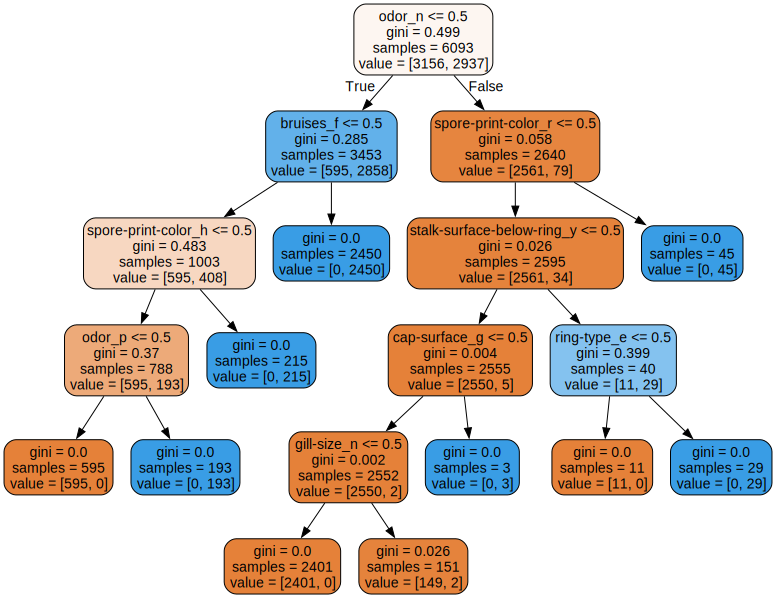

In [204]:
import graphviz

#파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

#화면에 출력
graphviz.Source(dot_data)

LogisticRegressor

In [205]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [206]:
train_score=lr_model.score(x_train,y_train)
test_score=lr_model.score(x_test,y_test)

print(f'train_score: {train_score}, test_score: {test_score}')

train_score: 0.9998358772361726, test_score: 0.999015263417036


스케일링: standardscaler

In [207]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_train)

scaled_train=ss.transform(x_train)
scaled_test=ss.transform(x_test)

학습 진행

In [176]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(scaled_train,y_train)

LogisticRegression()

In [177]:
scaled_train_score=lr_model.score(scaled_train,y_train)
scaled_test_score=lr_model.score(scaled_test,y_test)

print(f'scaled_train_score: {scaled_train_score}, scaled_test_score: {scaled_test_score}')

scaled_train_score: 1.0, scaled_test_score: 1.0


In [213]:
#최적의 solver 찾기
from sklearn.metrics import accuracy_score, roc_auc_score
solvers=['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    lr_model=LogisticRegression(solver=solver,max_iter=1000)
    lr_model.fit(x_train,y_train)
    lr_pred=lr_model.predict(x_test)
    lr_pred_proba=lr_model.predict_proba(x_test)[:,1]

    print('solver:{0}, accuracy: {1}, roc_auc: {2:.3f}'.format(solver, accuracy_score(y_test,lr_pred), roc_auc_score(y_test,lr_pred_proba)))

solver:lbfgs, accuracy: 0.999015263417036, roc_auc: 1.000
solver:liblinear, accuracy: 0.999015263417036, roc_auc: 1.000
solver:newton-cg, accuracy: 0.999015263417036, roc_auc: 1.000
solver:sag, accuracy: 0.999015263417036, roc_auc: 1.000
solver:saga, accuracy: 0.999015263417036, roc_auc: 1.000


Ensemble: Voting

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [209]:
k_model=KNeighborsClassifier()
dt_model=DecisionTreeClassifier(random_state=10)
lr_model=LogisticRegression()

In [214]:
from sklearn.ensemble import VotingClassifier

In [215]:
hard_v_model=VotingClassifier(estimators=[('k_model',k_model),('dt_model',dt_model),('lr_model',lr_model)],
                                            voting='hard')

soft_v_model=VotingClassifier(estimators=[('k_model',k_model),('dt_model',dt_model),('lr_model',lr_model)],
                                            voting='soft')

In [220]:
hard_v_model.fit(x_train.values,y_train.values)

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(max_iter=1000,
                                                 solver='saga'))])

In [219]:
soft_v_model.fit(x_train.values,y_train.values)

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(max_iter=1000,
                                                 solver='saga'))],
                 voting='soft')

성능 평가

In [221]:
hard_train_score=hard_v_model.score(x_train.values,y_train.values)
hard_test_score=hard_v_model.score(x_test.values,y_test.values)

soft_train_score=soft_v_model.score(x_train.values,y_train.values)
soft_test_score=soft_v_model.score(x_test.values,y_test.values)

In [222]:
print('[hard train score]',hard_train_score)
print('[hrad test score]',hard_test_score)

[hard train score] 1.0
[hrad test score] 1.0


In [223]:
print('[soft train score]',soft_train_score)
print('[soft test score]',soft_test_score)

[soft train score] 1.0
[soft test score] 1.0
